## Image Processing 08

Wirapat Prigphet (Gene) 620510618 <br/>
Suppapich Seetasith (Yale) 620510626 <br/>
Pakin Siwatammarat (Pirch) 620510677

### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab.patches import cv2_imshow

###  Sharpened image using a selected Laplacian mask 

#### Usefulness 


*   Image sharpening
*   Image segmentation
*   Edge detection

#### Read image 

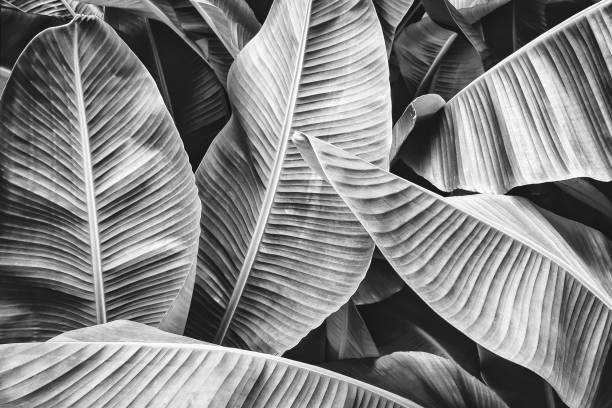

In [2]:
img = cv2.imread("/content/leaf.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

#### Processing

In [3]:
img_blurred  = cv2.GaussianBlur(img, (5,5), 1)
laplacian = cv2.Laplacian(img_blurred,cv2.CV_64F)
dst = img - laplacian

#### Display Result

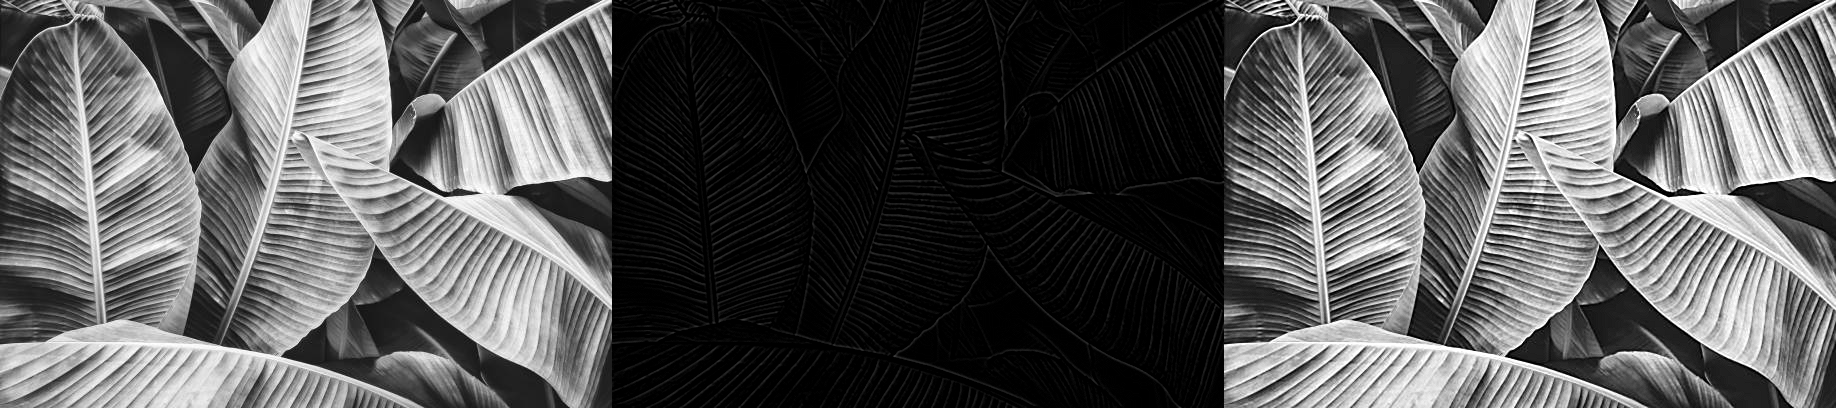

In [4]:
img_compare = np.concatenate((img, laplacian, dst), axis = 1)
cv2_imshow(img_compare)

The leftmost image is orginal image 

The middle image is result after apply laplace operator on blur image.We can see border of leaf.

The leftmost image is result.Image shaper than original. We. can see line structures in an image are more enhanced


### Unsharp masking 

#### Usefulness 




*   Sharpen the image 



#### Read image 

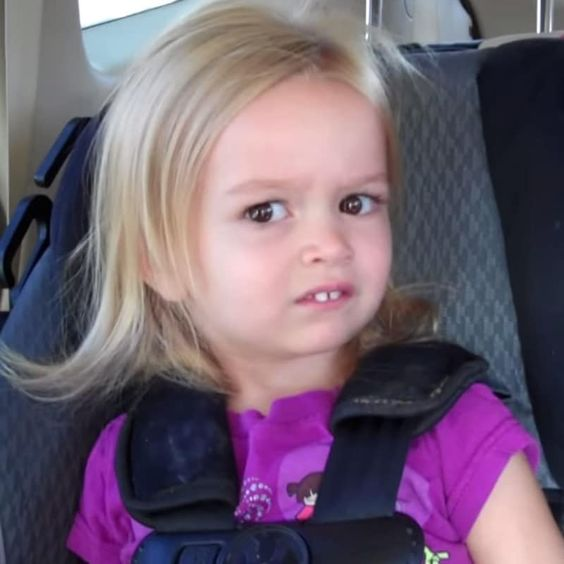

In [5]:
img = cv2.imread("confused_girl.png")
img_blurred  = cv2.GaussianBlur(img, (5,5),1)
cv2_imshow(img)

#### Processing

Unsharp masking 

In [6]:
# img_unmask = img + 1.0*(img - img_blurred) => k=1
img_unmask1 = cv2.addWeighted(img, 1.0 + 1.0, img_blurred, -1.0, 0)

 Unsharp masking with k < 0

In [7]:
# img_unmask = img - 0.5*(img - img_blurred) => k<0
img_unmask2 = cv2.addWeighted(img, 1.0 - 6, img_blurred, 6, 0)

#### Display Result

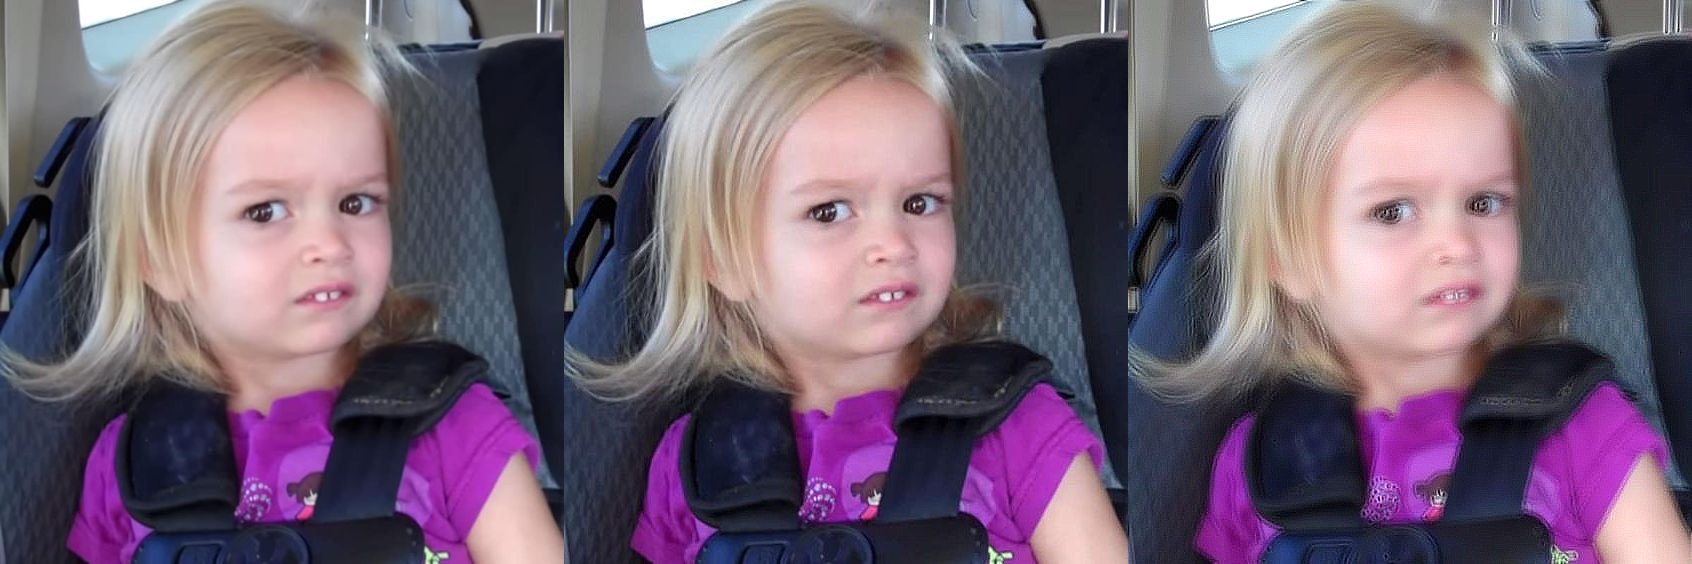

In [8]:
img_compare = cv2.hconcat([img, img_unmask1, img_unmask2])
cv2_imshow(img_compare)

The leftmost image is orginal image 

The middle image is unsharp masking by k=1.When using unsharp masking, the image will be sharper than the original image.



The leftmost image is unsharp masking by k<0.In the other hand if k<0  it will become reduce the benefits of unsharp mask .From the result image, the edges of the image are blurred.


###  Highboost filtering

#### Usefulness 


* emphasize high frequency components representing the image details without eliminating low frequency components

#### Read image 

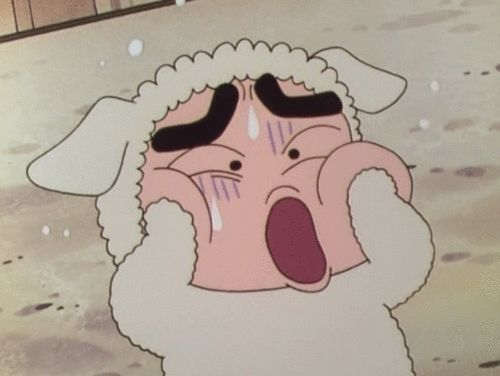

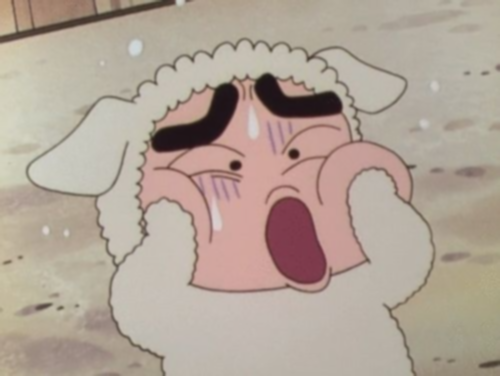

In [9]:
origi_img = cv2.imread("shinjan1.png")
blurred_img  = cv2.GaussianBlur(origi_img, (5,5),1)
cv2_imshow(origi_img)
cv2_imshow(blurred_img)

#### Processing

In [10]:
k = [2, 4, 6]
hbf_img = []
for i in k:
  hbf_img.append(cv2.addWeighted(origi_img, 1.0 + i, blurred_img, -i, 0))

#### Display Result

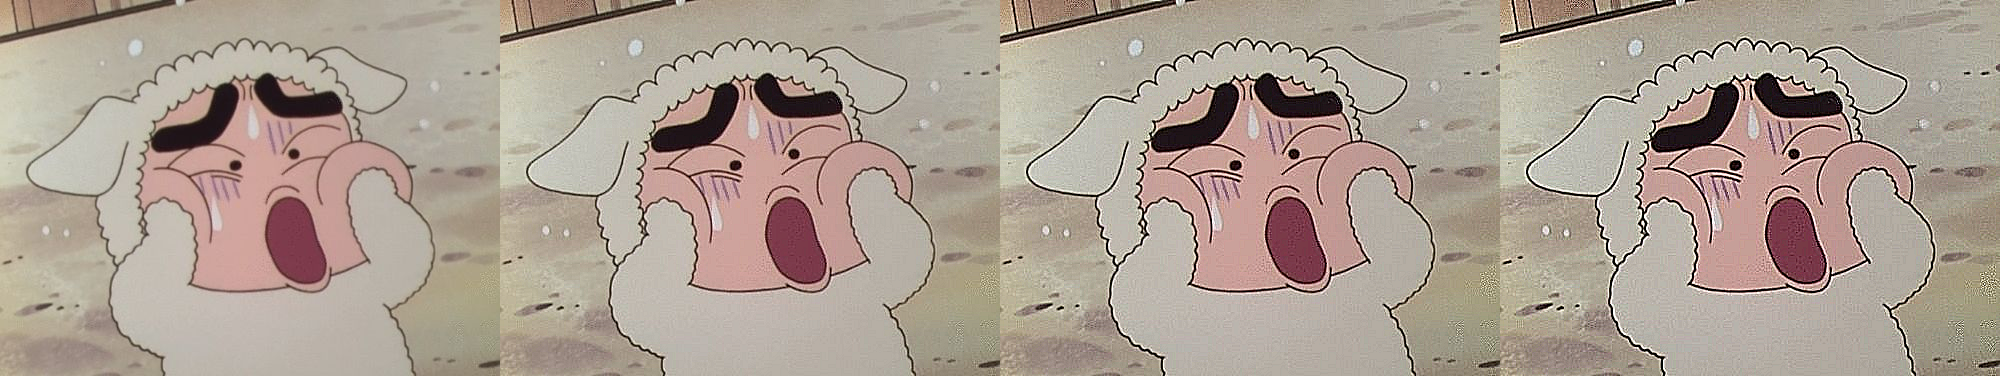

In [11]:
compared_img = cv2.hconcat([origi_img] + hbf_img)
cv2_imshow(compared_img)

The leftmost is original image. Next to the right one is highboost filtered image with k = 2, 4 and 6. You will see that If k is increased, image will be not much different. Because k is a lot it will multiply to color chanel then in each chanel will be more than 255 then it’ will be forced to 255 then reach certain value image will be same. For conclusion, objective of highboost-filtering is to emphasize high frequency component without losing low freqency component.

### Reference

OpenCV: **Laplace Operator.** (2021). Retrieved September 10, 2021, from Opencv.org website: https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
OpenCV: **Adding (blending) two images using OpenCV.** (2021). Retrieved September 10, 2021, from Opencv.org website: https://docs.opencv.org/master/d5/dc4/tutorial_adding_images.html
atul. (2019, May 14). **Unsharp Masking and Highboost filtering.** Retrieved September 10, 2021, from TheAILearner website: https://theailearner.com/2019/05/14/unsharp-masking-and-highboost-filtering/
